# Investigate Hotel Business Using Data Visualization

## **Tugas 1 Data Preprocessing**
**Output :**
Data Siap Digunakan Untuk Analisis

**Langkah - langkah :**
1. Load Dataset
2. Data Exploration
3. Data Cleansing
4. Data Visualization

### **Load Dataset**

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [120]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
df=pd.read_csv('/content/drive/MyDrive/Portofolio/Investigate Hotel Business using Data Visualization/hotel_bookings_data.csv')
pd.pandas.set_option("display.max_columns",None)
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out
5,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,107.0,0,0,Check-Out
7,Resort Hotel,0,9,2017,September,27,1,0,2,2,0.0,0,Full Board,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,303.0,NaN,0,Personal,103.0,0,1,Check-Out
8,Resort Hotel,1,85,2017,September,27,1,0,3,2,0.0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,82.0,0,1,Canceled
9,Resort Hotel,1,75,2017,September,27,1,0,3,2,0.0,0,Dinner,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,15.0,NaN,0,Personal,105.5,0,0,Canceled


### **Data Exploration**

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**Kesimpulan :**

1.   Dataset memeiliki 119390 data dan 29 fitur
2.   Terdapat 33261 data duplikat
3.   Terdapat 33261 data duplikat

In [123]:
# valaue dari setiap fitur
for col in df.columns:
    print("{} have {} unique values: {}".format(col, df[col].nunique(), df[col].dtypes))
    if df[col].dtypes == 'int64' or df[col].dtypes == 'float64' or df[col].dtypes == 'object':
        print("{} values: {}".format(col,df[col].unique()))
        print('-' * 100)


hotel have 2 unique values: object
hotel values: ['Resort Hotel' 'City Hotel']
----------------------------------------------------------------------------------------------------
is_canceled have 2 unique values: int64
is_canceled values: [0 1]
----------------------------------------------------------------------------------------------------
lead_time have 479 unique values: int64
lead_time values: [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 46

**Kesimpulan :**

1. Terdapat value **Undefined** pada fitur meal, market_segment, distribution_channel.
2. Pada fitur company dan agent memiliki value float, sehingga diperlukan analisis lanjutan karena kemungkinan merujuk pada id atau value yang telah di encoding
3. Akan dilakukan pengecekan data anomali pada fitur yang menunjukkan jumlah tamu yaitu adults, children, dan babies

In [124]:
# missing value
((df.isna().sum())/len(df)*100).round(2).sort_values(ascending=False)

company                           94.31
agent                             13.69
city                               0.41
hotel                              0.00
distribution_channel               0.00
total_of_special_requests          0.00
required_car_parking_spaces        0.00
adr                                0.00
customer_type                      0.00
days_in_waiting_list               0.00
deposit_type                       0.00
booking_changes                    0.00
previous_bookings_not_canceled     0.00
previous_cancellations             0.00
is_repeated_guest                  0.00
market_segment                     0.00
is_canceled                        0.00
meal                               0.00
babies                             0.00
children                           0.00
adults                             0.00
stays_in_weekdays_nights           0.00
stays_in_weekend_nights            0.00
arrival_date_day_of_month          0.00
arrival_date_week_number           0.00


**Kesimpulan :**

1. Terdapat **missing/null** value pada fitur company, city, children, agent
2. Akan dilakukan imputasi nilai pada missing value

In [125]:
# duplikasi data
df.duplicated().sum()

33261

**Kesimpulan :**

Terdapat duplikat data dan akan dihapus sehingga menyisakan satu unique value

In [126]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.37,0.48,0.00,0.00,0.00,1.0,1.0
lead_time,119390.0,104.01,106.86,0.00,18.00,69.00,160.0,737.0
arrival_date_year,119390.0,2018.16,0.71,2017.00,2018.00,2018.00,2019.0,2019.0
arrival_date_week_number,119390.0,27.17,13.61,1.00,16.00,28.00,38.0,53.0
arrival_date_day_of_month,119390.0,15.80,8.78,1.00,8.00,16.00,23.0,31.0
stays_in_weekend_nights,119390.0,0.93,1.00,0.00,0.00,1.00,2.0,19.0
stays_in_weekdays_nights,119390.0,2.50,1.91,0.00,1.00,2.00,3.0,50.0
adults,119390.0,1.86,0.58,0.00,2.00,2.00,2.0,55.0
children,119386.0,0.10,0.40,0.00,0.00,0.00,0.0,10.0
babies,119390.0,0.01,0.10,0.00,0.00,0.00,0.0,10.0


**Kesimpulan :**

Terdapat value negatif pada fitur adr, Averange Daily Rate (room revenue/number of room sold) dan perlu di drop


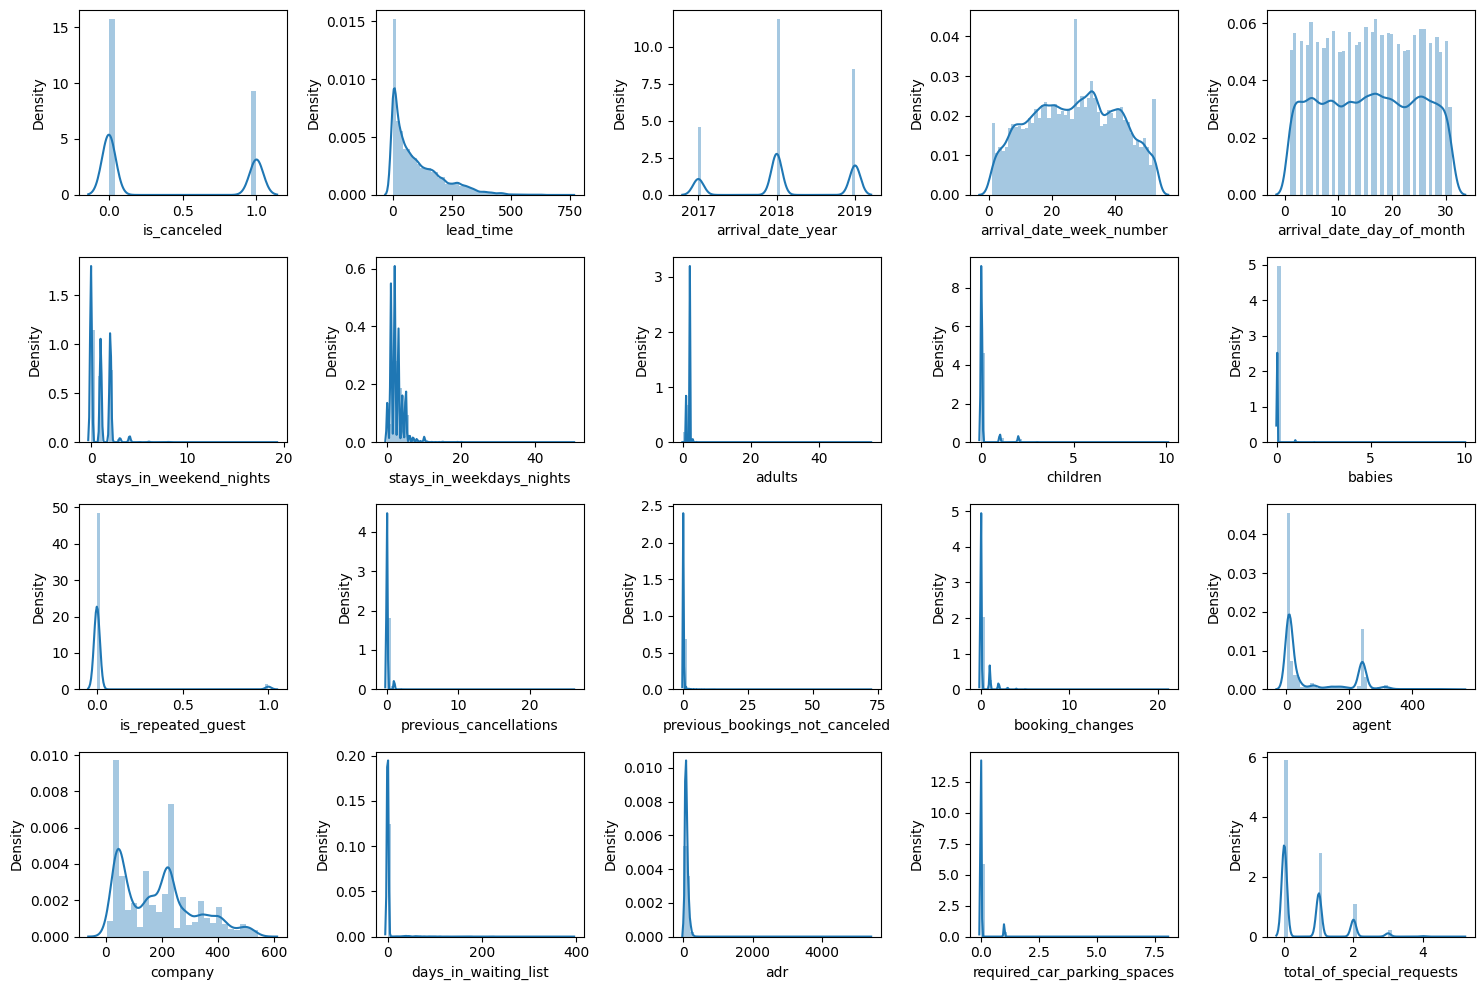

In [127]:
nums = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == float)].columns.tolist()

plt.figure(figsize=(15, 10))
for i in range(0, len(nums)):
    plt.subplot(4, 5, i+1)
    sns.distplot(df[nums[i]])
    plt.tight_layout()

**Kesimpulan :**

1. Fitur cenderung positively skewed
2. Fitur arrival_date_week_number dan arrival_date_day_of_month memiliki distribusi cenderung normal


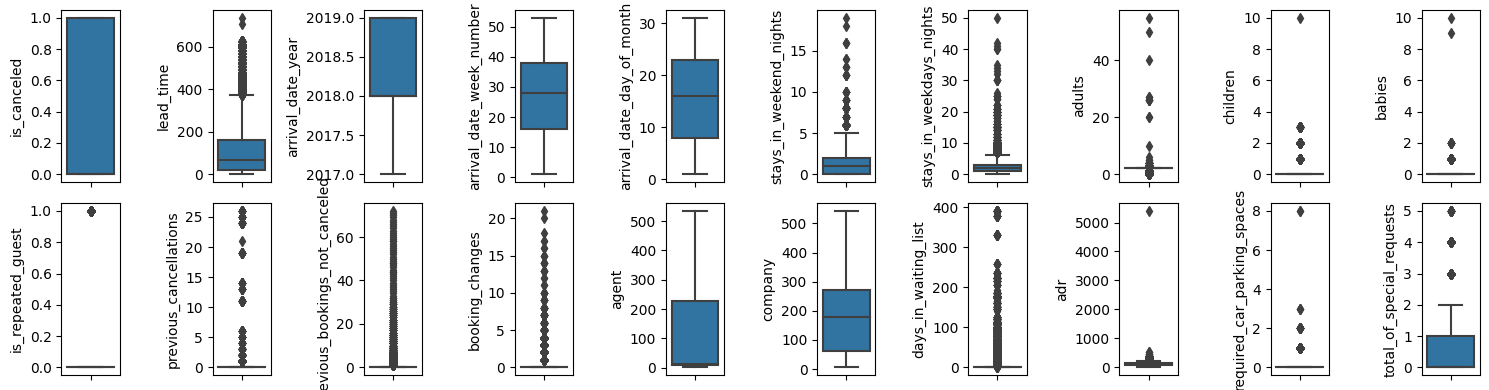

In [128]:
#Outlier

plt.figure(figsize=(15, 4))
for i in range(0, len(nums)):
    plt.subplot(2, 10, i+1)
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.tight_layout()

**Kesimpulan :**

1. Mayoritas fitur memiliki outlier
2. Terlihat nilai ekstrim pada fitur adr, required_car_parking_spaces, children, dan babies dan akan dilakukan **handling outlier**

In [129]:
guest_0 = df['adults']+df['children']+df['babies']
guest_0 = df[guest_0 == 0]
guest_0.shape[0]

180

**Kesimpulan :**

Terdapat 180 kamar tidak menerima tamu, sehingga akan dilakukan **drop** data

In [130]:
##Category

df.describe(exclude=np.number).round(2).T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,October,13877
meal,119390,5,Breakfast,92310
city,118902,177,Kota Denpasar,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Personal,89613
reservation_status,119390,3,Check-Out,75166


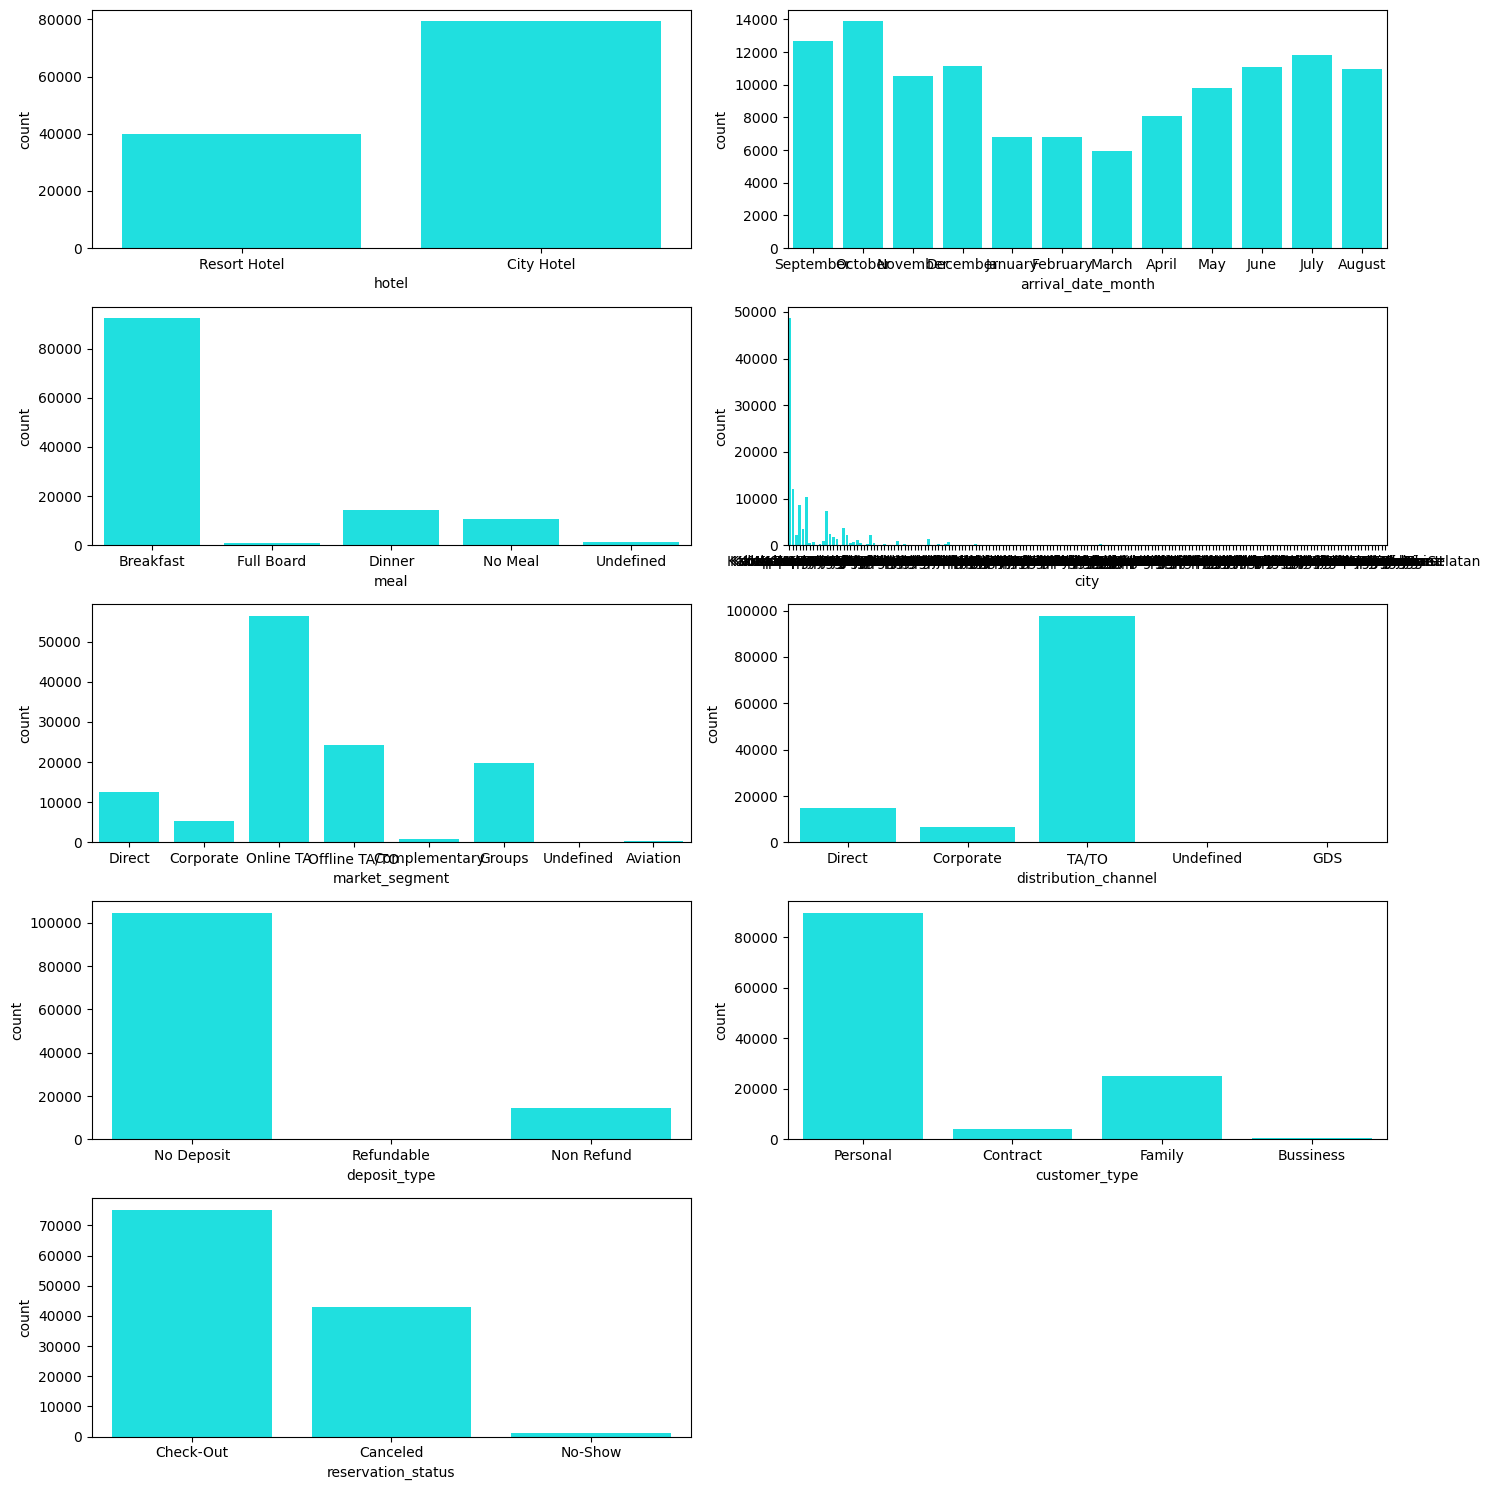

In [131]:
cats = df.loc[:, (df.dtypes == 'object')].columns.tolist()
plt.figure(figsize=(15, 15))
for i in range(0, len(cats)):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=df[cats[i]], color='cyan')
    plt.tight_layout()

### **Data Cleansing**

In [132]:
df_clean = df.copy()


In [133]:
# company, agent, children
ft = ['company', 'children', 'agent']
for col in ft:
    df_clean[col].fillna(0, inplace=True)

df_clean['city'].fillna('Undefined', inplace=True)

In [134]:
df_clean.isna().sum().sum()


0

**Kesimpulan Handling Null Values :**
1. Fitur yang terdapat null values company, city, children, agent diisi dengan 0
2. Fitur city - null values diisi dengan 'Undefined'

**Handling Inconsistent and Extream Values**

**Keterangan :**
Fitur meal dapat dikategorikan menjadi :

'With Meal' = Breakfast, Full Board, Dinner
'No Meal' = No Meal, Undefined

In [135]:
df_clean['meal'].replace('Undefined', 'No Meal', inplace = True)
df_clean['meal'].replace(['Breakfast', 'Full Board', 'Dinner'], 'With Meal', inplace = True)

In [136]:
df_clean['meal'].unique()

array(['With Meal', 'No Meal'], dtype=object)

In [137]:
df_clean['children'] = df_clean['children'].astype('int64')

In [138]:
# Menghapus nilai ekstrim pada data
index_adr = df_clean[(df_clean['adr'] < 0) | (df_clean['adr'] > 5000)]
df_clean.drop(index = index_adr.index, inplace=True)

index_parking = df_clean[(df_clean['required_car_parking_spaces'] == 8)]
df_clean.drop(index = index_parking.index, inplace=True)

index_bb = df_clean[(df_clean['babies'] > 8)]
df_clean.drop(index = index_bb.index, inplace=True)

index_ch = df_clean[(df_clean['children'] == 10)]
df_clean.drop(index = index_ch.index, inplace=True)

index_guest_0 = df_clean['adults']+df_clean['children']+df_clean['babies']
index_guest_0 = df_clean[index_guest_0 == 0]
df_clean.drop(index = index_guest_0.index, inplace=True)


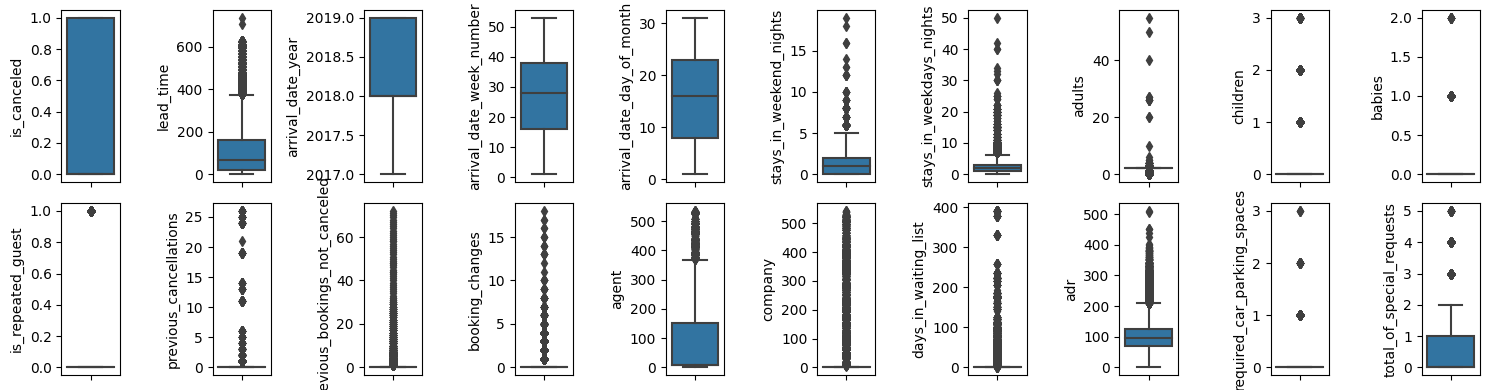

In [139]:
plt.figure(figsize=(15, 4))
for i in range(0, len(nums)):
    plt.subplot(2, 10, i+1)
    sns.boxplot(y=df_clean[nums[i]], orient='v')
    plt.tight_layout()

**Handling Duplicate Data**

In [140]:
df_clean.sample(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
95922,City Hotel,0,3,2018,October,35,25,0,1,3,0,0,With Meal,Kota Yogyakarta,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,179.0,1,1,Check-Out
108411,City Hotel,0,115,2019,May,12,22,1,4,2,0,0,No Meal,Kabupaten Blora,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0.0,0,Personal,74.8,0,2,Check-Out


**Keterangan :**
Data duplikat tidak di hapus karena:

1. Jumlah yang banyak dan penghapusan data duplikat mempengaruhi nilai statistik dalam analisis
2. Dalam dataset tidak terdapat unik_id/unik_booking_id dan tanggal, data duplikat bisa saja memiliki informasi penting. Mungkin terdapat pemesanan yang sama terjadi pada waktu yang berbeda.

In [141]:
print('Total Records Before Cleaned :', df.shape[0])
print('Total Records After Cleaned :', df_clean.shape[0])

Total Records Before Cleaned : 119390
Total Records After Cleaned : 119203


### **Data Visualization**


## **Tugas 2 Monthly Hotel Booking Analysis Based on Hotel Type**

**Output :**
Analisis dalam periode bulan / musim terhadap trend jumlah reservasi berdasarkan tipe hotel

**Langkah - langkah :**
1. Membuat tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel
2. Lakukan normalisasi data
3. Urutkan data berdasarkan bulan
4. Membuat plot yang dapat menunjukan perubahan jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel
5. Menginterpretasi terhadap hasil plot pada langkah sebelumnya

In [142]:
df_c = df_clean.copy()

In [143]:
# persentase total booking

hotel_type = df_c.groupby('hotel')[['hotel']].count()
#-------------------------------------------------------------------
hotel_type.columns = ['total']
hotel_type.reset_index(inplace=True)
hotel_type

,hotel,total
0,City Hotel,79160
1,Resort Hotel,40043


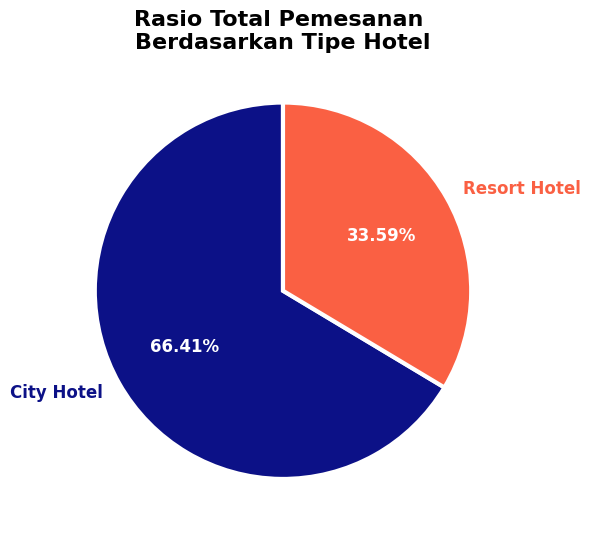

In [144]:
import random


colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
          for i in range(len(hotel_type['total']))]

fig, ax = plt.subplots(figsize=(6, 6))

patches, texts, pcts = ax.pie(
    hotel_type['total'], labels=hotel_type['hotel'], autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'large'},
    startangle=90, colors=colors)

for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())

plt.setp(pcts, color='white', fontweight='bold')
plt.setp(texts, fontweight=600)
ax.set_title('Rasio Total Pemesanan \nBerdasarkan Tipe Hotel', fontsize=16, pad=5, loc='center', fontweight='bold')

plt.tight_layout()
plt.show()


**Kesimpulan :**

1. City Hotel lebih banyak dipesan yaitu sebesar 66.41%
2. Presentase pemesanan Resort Hotel sebesar 33.59%

In [145]:
# total booking per bulan
monthly_booking = df_c.groupby(['hotel', 'arrival_date_month'])['arrival_date_year'].agg(['nunique', 'count']).reset_index()
monthly_booking

,hotel,arrival_date_month,nunique,count
0,City Hotel,April,2,4950
1,City Hotel,August,2,7885
2,City Hotel,December,2,7593
3,City Hotel,February,2,4114
4,City Hotel,January,2,4336
5,City Hotel,July,2,8221
6,City Hotel,June,2,7469
7,City Hotel,March,2,3729
8,City Hotel,May,2,6433
9,City Hotel,November,2,7392


**Kesimpulan :**

Mayoritas jumlah masing-masing bulan dapat dataset memiliki jumlah pada kolom nunique 2 **kecuali** untuk bulan October dan Septemper. Hal ini berpengaruh terhadap nilai kalkulasi dan hasilnya **bisa jadi kurang valid**. Sehingga perlu dilakukan **normalisasi** dengan menghitung rata-ratanya (total/nunique).

**Normalisasi**

In [146]:
monthly_booking['average'] = round(monthly_booking['count']/monthly_booking['nunique'])
monthly_booking

,hotel,arrival_date_month,nunique,count,average
0,City Hotel,April,2,4950,2475.0
1,City Hotel,August,2,7885,3942.0
2,City Hotel,December,2,7593,3796.0
3,City Hotel,February,2,4114,2057.0
4,City Hotel,January,2,4336,2168.0
5,City Hotel,July,2,8221,4110.0
6,City Hotel,June,2,7469,3734.0
7,City Hotel,March,2,3729,1864.0
8,City Hotel,May,2,6433,3216.0
9,City Hotel,November,2,7392,3696.0


In [147]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_booking['month'] = monthly_booking['arrival_date_month'].str[:3]
monthly_booking['month'] = pd.Categorical(monthly_booking['month'], categories=months)
monthly_booking.sort_values('month')

,hotel,arrival_date_month,nunique,count,average,month
4,City Hotel,January,2,4336,2168.0,Jan
16,Resort Hotel,January,2,2435,1218.0,Jan
3,City Hotel,February,2,4114,2057.0,Feb
15,Resort Hotel,February,2,2645,1322.0,Feb
7,City Hotel,March,2,3729,1864.0,Mar
19,Resort Hotel,March,2,2191,1096.0,Mar
0,City Hotel,April,2,4950,2475.0,Apr
12,Resort Hotel,April,2,3102,1551.0,Apr
20,Resort Hotel,May,2,3331,1666.0,May
8,City Hotel,May,2,6433,3216.0,May


**Visualisasi**

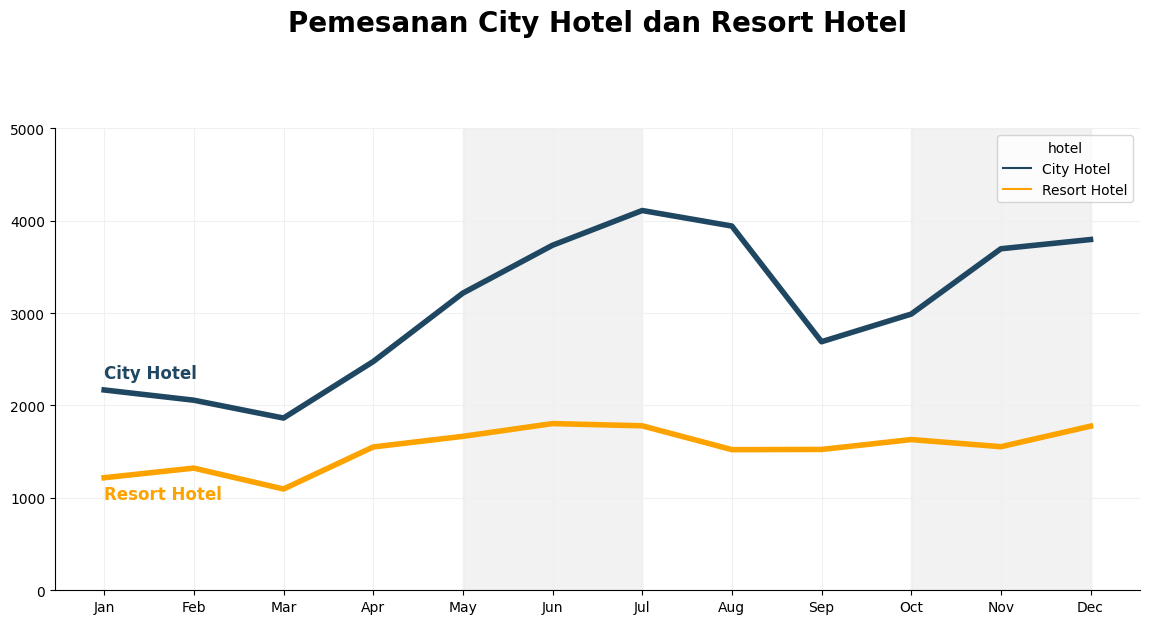

In [148]:
plt.style.use('default')
fig, ax = plt.subplots()
fig.set_size_inches(14, 6)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

sns.lineplot(x='month', y='average', hue='hotel', data=monthly_booking, palette=['#1f4762', '#fda300'], linewidth=4)
plt.grid(color='#f0f0f0')
plt.ylim(0, 5000)

plt.tick_params(axis='both', which='major', labelsize=10)
plt.ylabel('')
plt.xlabel('')

plt.text(x=0, y=2300, s='City Hotel', fontsize=12, color='#1f4762', ha='left', fontweight='bold')
plt.text(x=0, y=990, s='Resort Hotel', fontsize=12, color='#fda300', ha='left', fontweight='bold')

plt.title('Pemesanan City Hotel dan Resort Hotel', fontsize=20, pad=70, loc='center', fontweight='bold')

plt.stackplot([4, 5, 6], [5000], color='grey', alpha=0.1)  # Perhatikan penambahan alpha=0.1 di sini
plt.stackplot([9, 10, 11], [5000], color='grey', alpha=0.1)  # Perhatikan penambahan alpha=0.1 di sini

plt.show()


**Kesimpulan :**

1. Terdapat peningkatan dalam pemesanan hotel pada bulan Mei - Juli, dan Oktober - Desember pada tipe City Hotel.
2. Tidak terdapat perubahan yang signifikan pada tipe Resort Hotel

## **Tugas 3 Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates**

**Output :**
Analisis bagaimana korelasi antara Durasi Menginap terhadap status pembatalan reservasi

**Total Cancelation Rate**

In [149]:
df_city = df_c[df_c['hotel']=='City Hotel']

# group fitur iscanceled dan agregasi menggunakan count
cancel = df_city.groupby('is_canceled')[['is_canceled']].count()
#-------------------------------------------------------------------
cancel.columns = ['total']
cancel.reset_index(inplace=True)

lgn = {0: 'Not Canceled',
       1: 'Canceled'}
cancel['is_canceled'] = cancel['is_canceled'].map(lgn)
cancel

,is_canceled,total
0,Not Canceled,46082
1,Canceled,33078


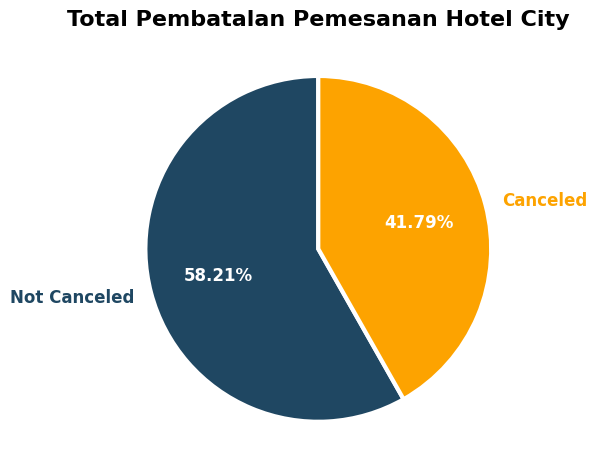

In [150]:
fig, ax = plt.subplots(figsize=(6, 6))

patches, texts, pcts = ax.pie(
    cancel['total'], labels=cancel['is_canceled'], autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'large'},
    startangle=90, colors=['#1f4762', '#fda300'])

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white', fontweight='bold')
plt.setp(texts, fontweight=600)
ax.set_title('Total Pembatalan Pemesanan Hotel City', fontsize=16, pad=5, loc='center',fontweight='bold')
plt.tight_layout()

In [151]:
df_resort = df_c[df_c['hotel']=='Resort Hotel']

cancel = df_resort.groupby('is_canceled')[['is_canceled']].count()

cancel.columns = ['total']
cancel.reset_index(inplace=True)

lgn = {0: 'Not Canceled',
       1: 'Canceled'}
cancel['is_canceled'] = cancel['is_canceled'].map(lgn)
cancel

,is_canceled,total
0,Not Canceled,28924
1,Canceled,11119


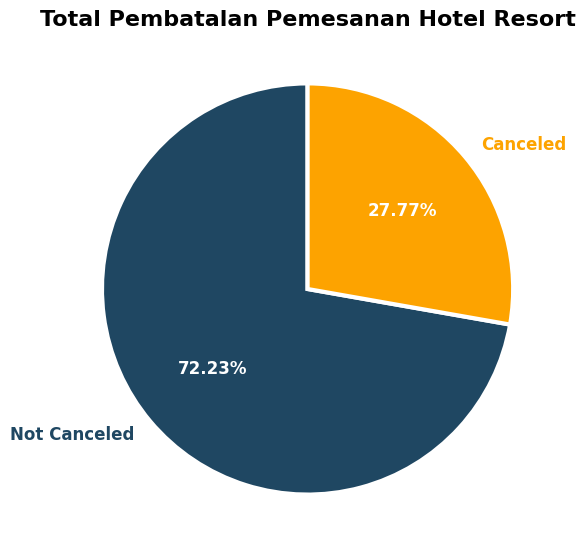

In [152]:
fig, ax = plt.subplots(figsize=(6, 6))

patches, texts, pcts = ax.pie(
    cancel['total'], labels=cancel['is_canceled'], autopct='%.2f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'large'},
    startangle=90, colors=['#1f4762', '#fda300'])

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white', fontweight='bold')
plt.setp(texts, fontweight=600)
ax.set_title('Total Pembatalan Pemesanan Hotel Resort', fontsize=16, pad=5, loc='center',fontweight='bold')
plt.tight_layout()


**Kesimpulan :**

City Hotel juga memiliki presentase cancellation rate yang lebih tinggi dibandingkan dengan Resort Hotel yaitu dengan presentase 41.79%.

**Durasi Menginap**

In [153]:
df_c['total_stay_duration'] = df_c['stays_in_weekdays_nights'] + df_c['stays_in_weekend_nights']
df_c.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_stay_duration
67331,City Hotel,1,113,2019,July,18,1,1,4,2,0,0,No Meal,Kota Yogyakarta,Online TA,TA/TO,0,0,0,2,No Deposit,9.0,0.0,0,Personal,110.40,0,0,Canceled,5
30785,Resort Hotel,0,11,2018,February,49,2,0,2,2,0,0,With Meal,Kota Denpasar,Complementary,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,0.00,0,1,Check-Out,2
79771,City Hotel,1,21,2017,January,46,13,2,2,2,0,0,With Meal,Kota Denpasar,Online TA,TA/TO,0,1,0,0,No Deposit,9.0,0.0,0,Contract,82.45,0,1,Canceled,4
76228,City Hotel,1,179,2017,October,34,22,2,1,2,0,0,With Meal,Kota Denpasar,Groups,TA/TO,0,1,0,0,Non Refund,1.0,0.0,0,Family,86.00,0,0,Canceled,3
87618,City Hotel,0,69,2018,June,17,21,0,2,3,0,0,With Meal,Kabupaten Magelang,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0.0,0,Personal,137.70,0,2,Check-Out,2


<Axes: xlabel='total_stay_duration', ylabel='Count'>

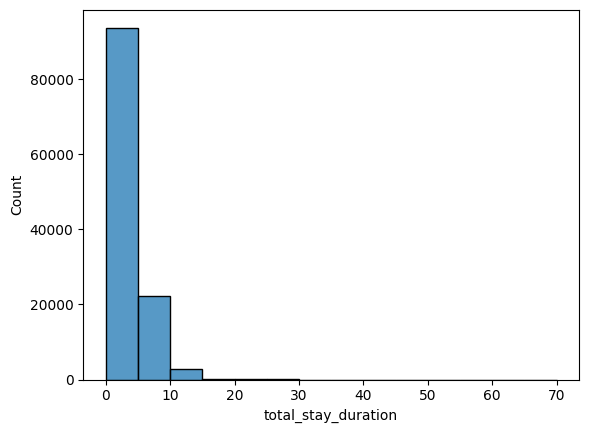

In [154]:
sns.histplot(df_c['total_stay_duration'], binwidth=5)

In [155]:
unik = df_c['total_stay_duration'].nunique()
mx = df_c['total_stay_duration'].max()
mn = df_c['total_stay_duration'].min()

print('Nilai unik:', unik)
print('Max durasi:', mx)
print('Min durasi:', mn)

Nilai unik: 42
Max durasi: 69
Min durasi: 0


**Kesimpulan :**

Total durasi menginap pelanggan memiliki rentang antara 0 hingga 69 hari. Durasi dikategorikan dalam mingguan

* < 1 : 0 - 7 hari
* 1 - 2 : 8 - 14 hari
* 2 - 3 : 15 - 21 hari
* 2 - 4 : 22 - 28 hari
* 4 > : > 28 hari



In [156]:
df_c['total_stay_week'] = np.where((df_c['total_stay_duration']) < 8, '< 1' ,
                                   np.where((df_c['total_stay_duration']) < 15, '1-2',
                                   np.where((df_c['total_stay_duration']) < 22, '2-3',
                                   np.where((df_c['total_stay_duration']) < 29, '3-4', '> 4'))))

In [157]:
df_c['total_stay_week'].value_counts()

< 1    113979
1-2      4795
2-3       274
3-4       108
> 4        47
Name: total_stay_week, dtype: int64

**Cancelation Rate by Duration**

In [158]:
cancel_rate = df_c.groupby(['hotel', 'total_stay_week']).agg({'is_canceled' : 'sum', 'arrival_date_day_of_month' : 'count'}).reset_index()
cancel_rate['cancel_rate'] = 100*(cancel_rate['is_canceled'] / cancel_rate['arrival_date_day_of_month']).round(2)
cancel_rate



week = ['< 1', '1-2', '2-3', '3-4', '> 4']
cancel_rate['total_stay_week'] = pd.Categorical(cancel_rate['total_stay_week'], categories = week)
cancel_rate = cancel_rate.sort_values('total_stay_week')
cancel_rate

,hotel,total_stay_week,is_canceled,arrival_date_day_of_month,cancel_rate
3,City Hotel,< 1,32403,77939,42.0
8,Resort Hotel,< 1,9917,36040,28.0
0,City Hotel,1-2,558,1069,52.0
5,Resort Hotel,1-2,1077,3726,29.0
1,City Hotel,2-3,76,105,72.0
6,Resort Hotel,2-3,79,169,47.0
2,City Hotel,3-4,21,25,84.0
7,Resort Hotel,3-4,39,83,47.0
4,City Hotel,> 4,20,22,91.0
9,Resort Hotel,> 4,7,25,28.0


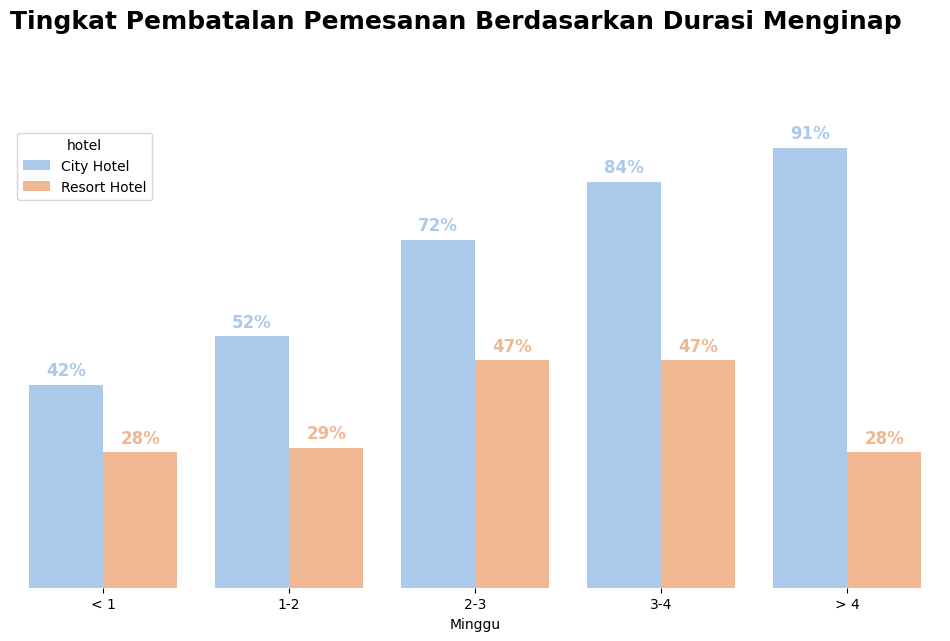

In [159]:
import seaborn as sns

plt.style.use('default')
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

ax = sns.barplot(x=cancel_rate['total_stay_week'], y=cancel_rate['cancel_rate'], hue=cancel_rate['hotel'],
                 hue_order=['City Hotel', 'Resort Hotel'], palette=sns.color_palette('pastel'))

plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
plt.ylabel('')
plt.xlabel('Minggu')

plt.title('Tingkat Pembatalan Pemesanan Berdasarkan Durasi Menginap', fontsize=18, pad=70, loc='left', fontweight='bold')

for a in ax.patches:
    txt = np.round(a.get_height(), decimals=2)
    anot = str(round(txt))
    color = a.get_facecolor()
    ax.annotate(anot + '%', (a.get_x() + a.get_width() / 2, a.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points', fontsize=12, fontweight='bold', color=color)


**Kesimpulan :**

1. Tingkat pembatalan akan semakin tinggi seiring dengan lama durasi menginap yang dipesan pada kedua tipe hotel.
2. Pada City Hotel untuk durasi menginap lebih dari 2 minggi memiliki Cancelation Rate lebih dari 50%, apalagi untuk durasi menginap lebih dari sebulan hanya 1 dari 10 orang yang tidak membatalkan pesanannya.

## Tugas 4 Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

**Output :** Analisis jarak waktu pemesanan hotel terhadap tingkat pembatalan pemesanan hotel

<Axes: xlabel='lead_time', ylabel='Count'>

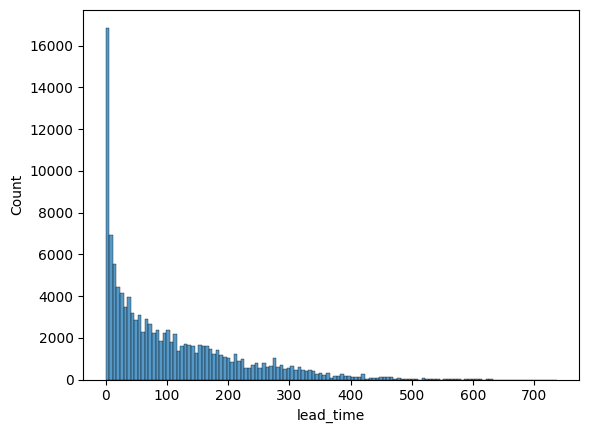

In [160]:
# distribusi lead time
sns.histplot(df_c['lead_time'])

In [161]:
unik = df_c['lead_time'].nunique()
mx = df_c['lead_time'].max()
mn = df_c['lead_time'].min()

print('Nilai unik:', unik)
print('Max durasi:', mx)
print('Min durasi:', mn)

Nilai unik: 479
Max durasi: 737
Min durasi: 0


**Kesimpulan :**

Lead time memiliki rentang 0 hingga 709 hari, sehingga akan dibuat pengkategorian perbualan untuk memudahkan dalam interpretasi

In [162]:
df_c['lead_category'] = np.where((df_c['lead_time']) < 31, '1',
                        np.where((df_c['lead_time']) <= 61, '2',
                        np.where((df_c['lead_time']) <= 91, '3',
                        np.where((df_c['lead_time']) <= 121, '4',
                        np.where((df_c['lead_time']) <= 151, '5',
                        np.where((df_c['lead_time']) <= 181, '6',
                        np.where((df_c['lead_time']) <= 211, '7',
                        np.where((df_c['lead_time']) <= 241, '8',
                        np.where((df_c['lead_time']) <= 271, '9',
                        np.where((df_c['lead_time']) <= 301, '10',
                        np.where((df_c['lead_time']) <= 331, '11',
                        np.where((df_c['lead_time']) <= 361, '12', '>1 tahun'))))))))))))

In [163]:
df_c['lead_category'].value_counts()

1           38578
2           17462
3           12398
4           10359
5            8237
6            7784
7            5609
8            4180
10           3524
>1 tahun     3405
9            3377
11           2581
12           1709
Name: lead_category, dtype: int64

**Cancelation Rate by Lead Time**

In [164]:
lead_cancel = df_c.groupby(['hotel', 'lead_category']).agg({'is_canceled' : 'sum', 'arrival_date_day_of_month' : 'count'}).reset_index()
lead_cancel['lead_cr'] = 100*(lead_cancel['is_canceled'] / lead_cancel['arrival_date_day_of_month']).round(2)


cat = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '>1 tahun']
lead_cancel['lead_category'] = pd.Categorical(lead_cancel['lead_category'], categories = cat)
lead_cancel = lead_cancel.sort_values('lead_category')
lead_cancel

,hotel,lead_category,is_canceled,arrival_date_day_of_month,lead_cr
0,City Hotel,1,5184,23243,22.0
13,Resort Hotel,1,1984,15335,13.0
4,City Hotel,2,4802,12253,39.0
17,Resort Hotel,2,1593,5209,31.0
5,City Hotel,3,3601,8774,41.0
18,Resort Hotel,3,1279,3624,35.0
19,Resort Hotel,4,1157,2993,39.0
6,City Hotel,4,3464,7366,47.0
20,Resort Hotel,5,1040,2537,41.0
7,City Hotel,5,2574,5700,45.0


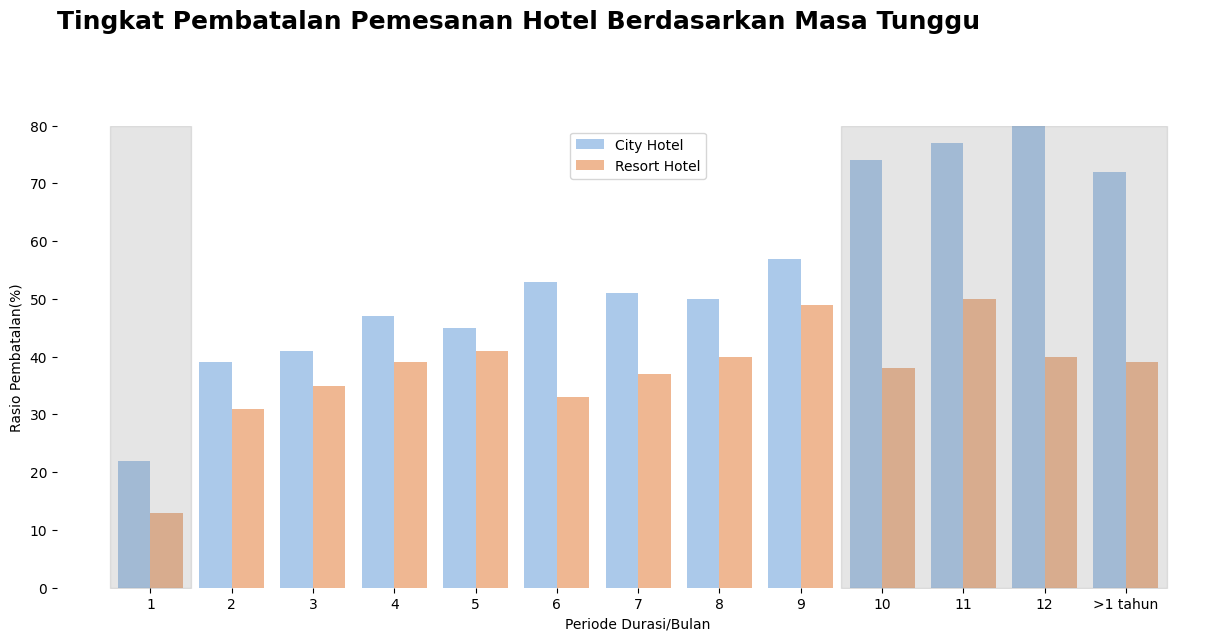

In [166]:
import seaborn as sns

plt.style.use('default')
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)


pastel_palette = sns.color_palette('pastel')
ax = sns.barplot(x=lead_cancel['lead_category'], y=lead_cancel['lead_cr'], hue=lead_cancel['hotel'],
                 hue_order=['City Hotel', 'Resort Hotel'], palette=pastel_palette)
plt.ylim(0, 80)

plt.ylabel('Rasio Pembatalan(%)')
plt.xlabel('Periode Durasi/Bulan')
plt.legend(loc='upper center')

plt.title('Tingkat Pembatalan Pemesanan Hotel Berdasarkan Masa Tunggu', fontsize=18, pad=70, loc='left', fontweight='bold')


plt.stackplot([-0.5, 0.5], [80], color='grey', alpha=0.2)
plt.stackplot([8.5, 12.5], [80], color='grey', alpha=0.2)


**Kesimpulan :**

Tingkat pembatalan berdasarkan masa tunggu masih didominasi oleh City Hotel, dengan tingkat Cancelation Rate cenderung tinggi ketika masa tunggu hampir satu tahun.